In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

In [10]:
df = pd.read_csv('./work/viikko8/datasets/iris.csv')

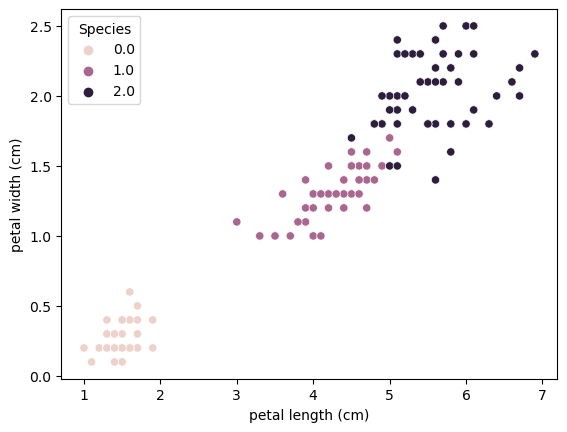

In [11]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='Species', data=df)
plt.show()

In [12]:
X = df.iloc[:, 0:4]
y = df.iloc[:, [4]]
columns = X.columns

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# Training the Decision Tree Classification model
model = tree.DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X_train, y_train)

mfi = model.feature_importances_

In [14]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred_pros = model.predict_proba(X_test)

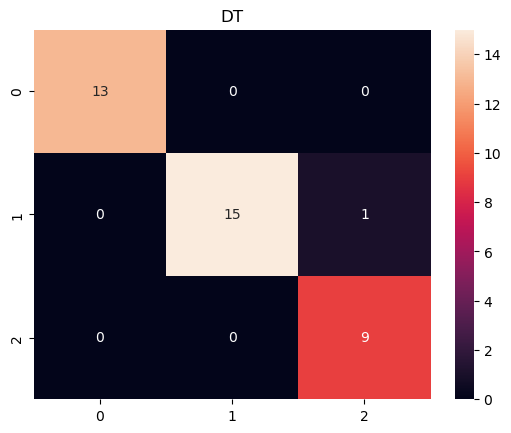

Accuracy score: 0.9736842105263158


In [15]:
# Making the Confusion Matrix and accuracy_score
cm = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_title("DT")
plt.show()

# Calculate accuracy score
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {score}")

In [16]:
# Create dot file for graphviz visualization
dot_data = export_graphviz(
            model,
            out_file =  None,
            feature_names = columns,
            class_names = df['Class'].unique(),
            filled = True,
            rounded = True)

graph = graphviz.Source(dot_data)
graph.render('./work/viikko8/iris')

'work/viikko8/iris.pdf'